In [19]:
import xgboost as xgb
from catboost import CatBoostClassifier, cv ,Pool
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedShuffleSplit, GridSearchCV
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer,KNNImputer
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import itertools as it

In [2]:
data = pd.read_csv('./data/orange_small_churn_train_data.csv')

In [3]:
# check disbalance in classes
print(data['labels'].value_counts())
print(data['labels'].unique())

-1.0    16921
 1.0     1377
Name: labels, dtype: int64
[-1.  1. nan]


In [4]:
data['labels'].replace(-1, 0, inplace=True)
data.dropna(subset=['labels'], inplace=True)
labels = data['labels']
data = data.iloc[:,:-1]

In [5]:
cat_boost_selecting_feature = ['Var126', 'Var113', 'Var199', 'Var57', 'Var202', 'Var74', 'Var218', 'Var73', 'Var205', 'Var81',
 'Var207', 'Var133', 'Var38', 'Var192', 'Var216', 'Var13', 'Var193', 'Var222', 'Var134', 'Var153', 'Var123', 'Var226', 'Var149',
 'Var210', 'Var206', 'Var212', 'Var219', 'Var204', 'Var125', 'Var28']

In [6]:
numeric_col = data.columns[1:190]
new_numeric = np.intersect1d(numeric_col, cat_boost_selecting_feature)

In [7]:
data_dec = data[new_numeric]

In [13]:
data_dec.head()

,Var113,Var123,Var125,Var126,Var13,Var133,Var134,Var149,Var153,Var28,Var38,Var57,Var73,Var74,Var81
0,-1209960.0,66.0,28628.845607,4.000000,1245.570151,326915.0,604276.0,389396.0,2313888.0,200.00,82752.0,2.907926,34,102.637361,14599.92
1,417932.0,66.0,24912.000000,40.000000,636.000000,1934460.0,349568.0,735.0,6502680.0,166.56,2706120.0,5.870327,128,0.000000,67529.09
2,-124655.2,78.0,7218.000000,36.000000,448.000000,3148410.0,1086210.0,0.0,10569040.0,311.76,4698780.0,5.981628,166,245.000000,85266.00
3,378473.6,24.0,693.000000,-0.550283,4.000000,7066700.0,650390.0,0.0,9676200.0,220.08,864384.0,5.108097,30,0.000000,74107.20
4,142602.4,60.0,468.000000,-28.000000,0.000000,3794460.0,642816.0,554414.0,10535200.0,278.00,4364880.0,0.650716,32,0.000000,171072.90


In [12]:
data_dec.fillna(dict(data_dec.mean(axis=0)), inplace=True)

In [14]:
scaled_data = StandardScaler().fit_transform(data_dec)

In [50]:
tsne_data = TSNE(n_components=2, perplexity=50).fit_transform(scaled_data)

In [51]:
pca_data = PCA(n_components=2).fit_transform(scaled_data)

In [52]:
def plot_dec_data(data, labels):
    plt.figure(figsize=(20,20))
    plt.scatter(data[:,0], data[:,1], cmap='seismic', c=labels)
    plt.show()

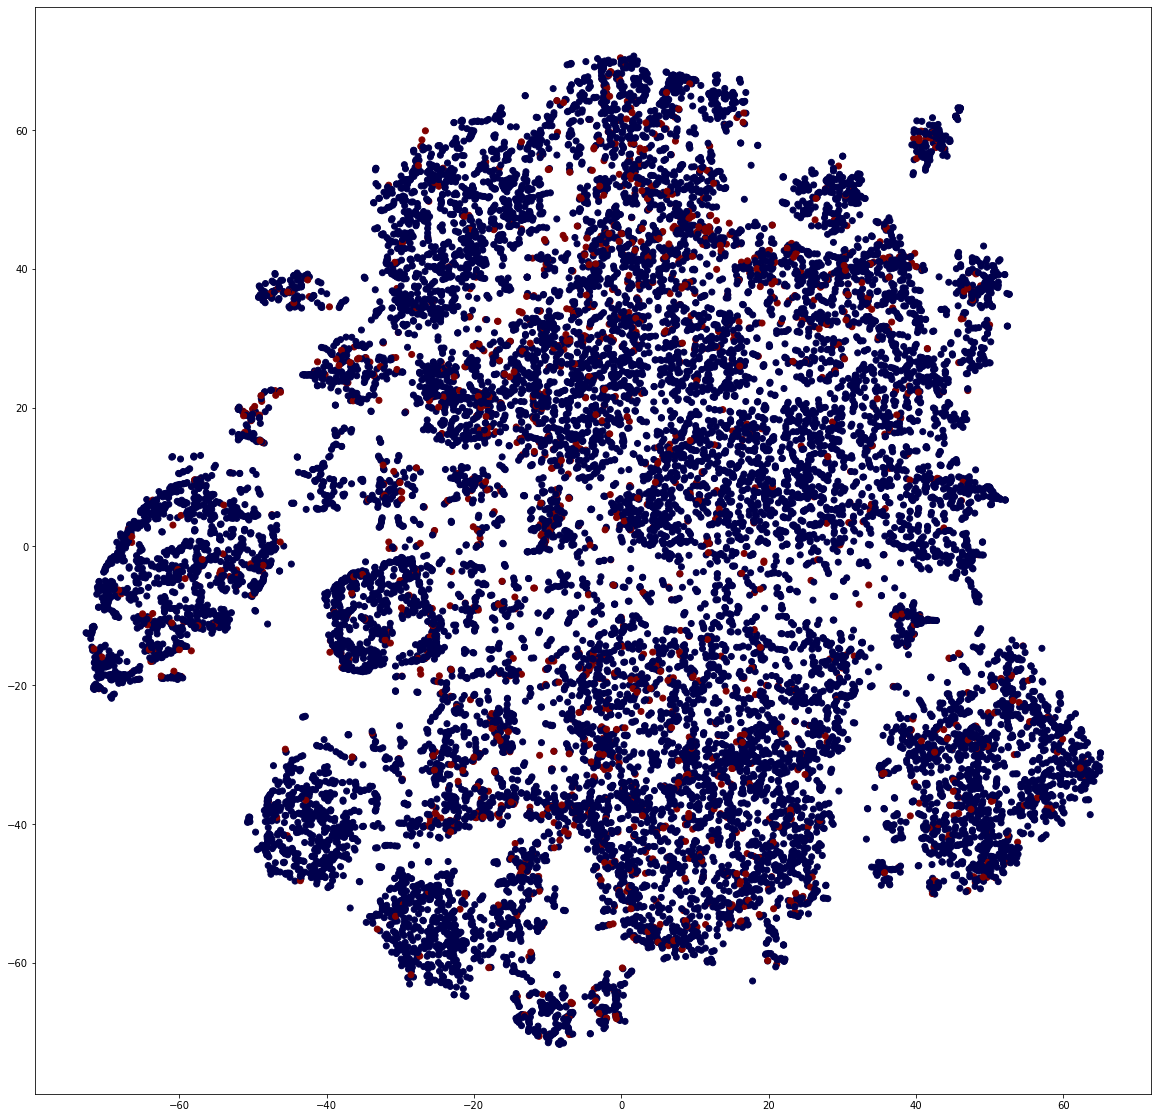

In [53]:
plot_dec_data(tsne_data, labels)

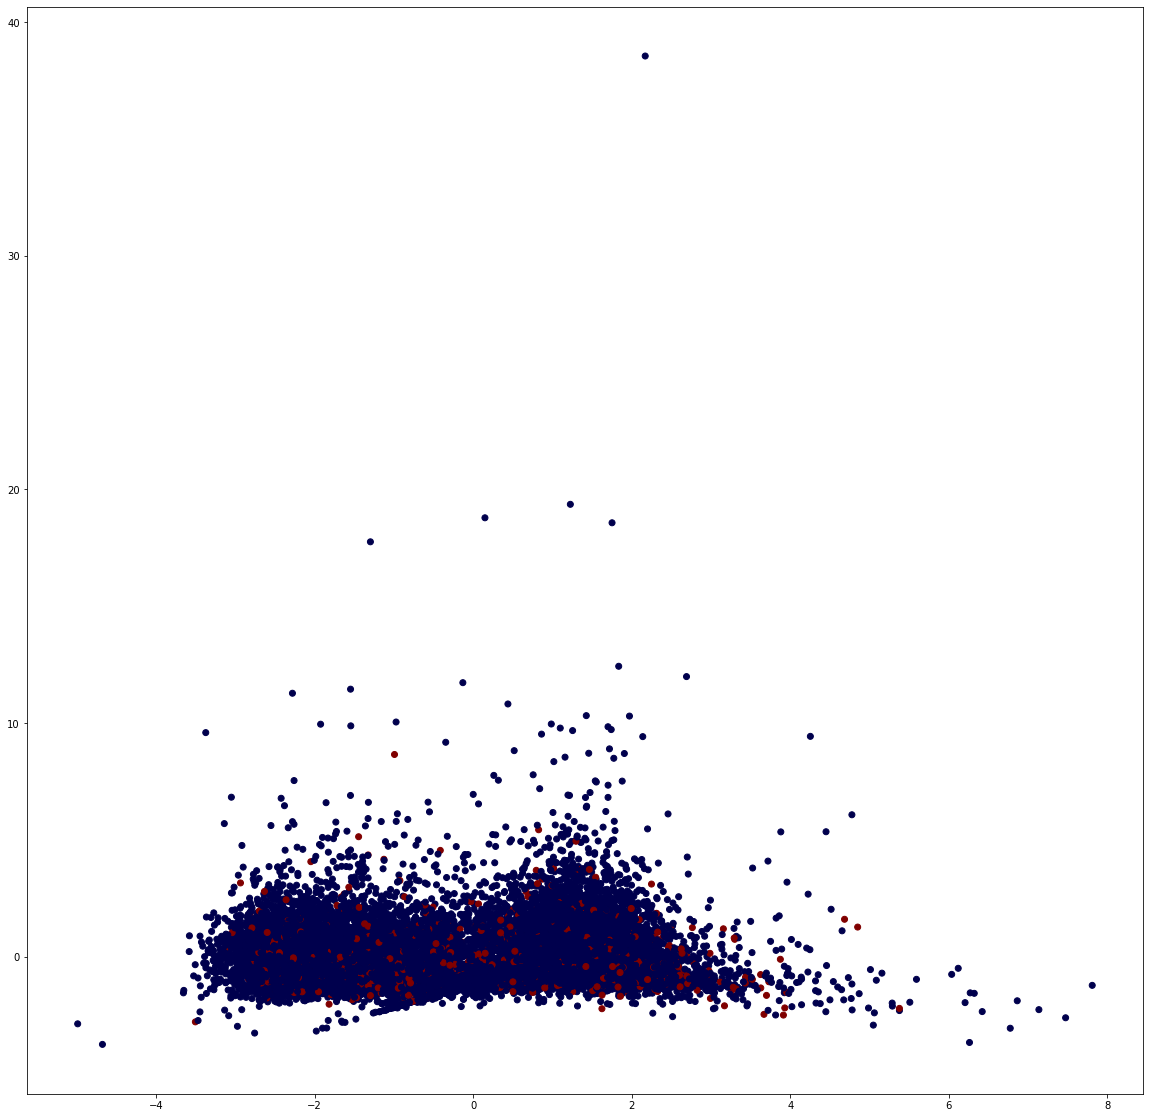

In [45]:
plot_dec_data(pca_data, labels)